## Check and Resolve Missing Data

In [1]:
# pip install missingno

In [2]:
import pandas as pd
import missingno as msno

In [3]:
csv_train_file = pd.read_csv('./siim-isic-melanoma-classification/train.csv')
csv_test_file = pd.read_csv('./siim-isic-melanoma-classification/test.csv')

csv_train_file.name = 'Training Set'
csv_test_file.name = 'Test Set'

def concat_df(csv_train_file, csv_test_file):
    # Returns a concatenated df of training and test set
    return pd.concat([csv_train_file, csv_test_file], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:33125], all_data.loc[33126:].drop(['diagnosis', 'benign_malignant', 'target'], axis=1)

df_all = concat_df(csv_train_file, csv_test_file)

dfs = [csv_train_file, csv_test_file]

In [4]:
print(csv_train_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB
None


In [5]:
print(csv_test_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10982 non-null  object 
 1   patient_id                     10982 non-null  object 
 2   sex                            10982 non-null  object 
 3   age_approx                     10982 non-null  float64
 4   anatom_site_general_challenge  10631 non-null  object 
dtypes: float64(1), object(4)
memory usage: 429.1+ KB
None


In [6]:
csv_train_file.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [7]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
image_name column missing values: 0
patient_id column missing values: 0
sex column missing values: 65
age_approx column missing values: 68
anatom_site_general_challenge column missing values: 527
diagnosis column missing values: 0
benign_malignant column missing values: 0
target column missing values: 0


Test Set
image_name column missing values: 0
patient_id column missing values: 0
sex column missing values: 0
age_approx column missing values: 0
anatom_site_general_challenge column missing values: 351




### Bar Chart

msno.bar is a simple visualization of nullity by column. You can switch to a logarithmic scale by specifying log=True.

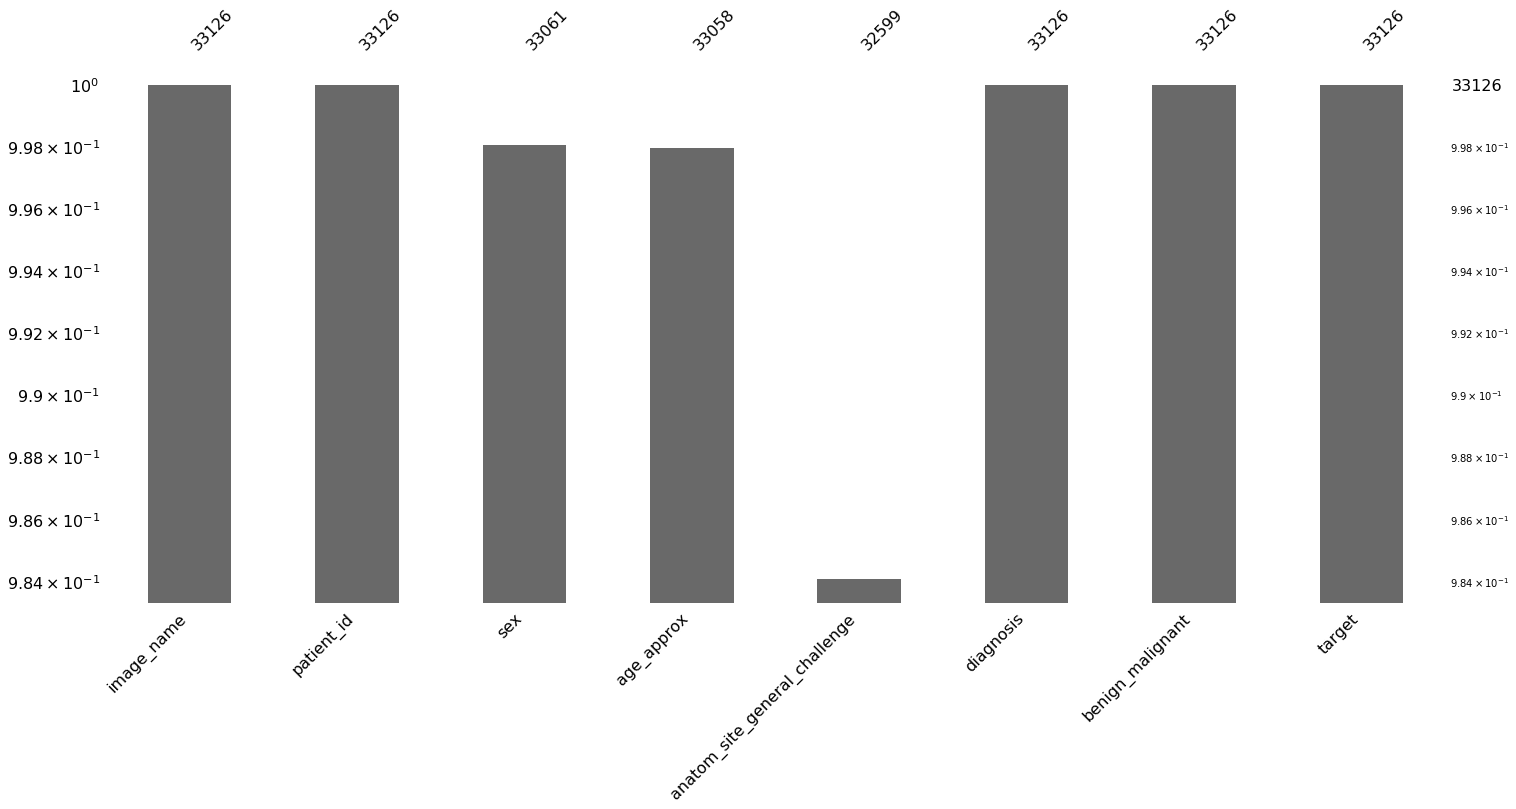

In [8]:
msno.bar(csv_train_file, log=True)

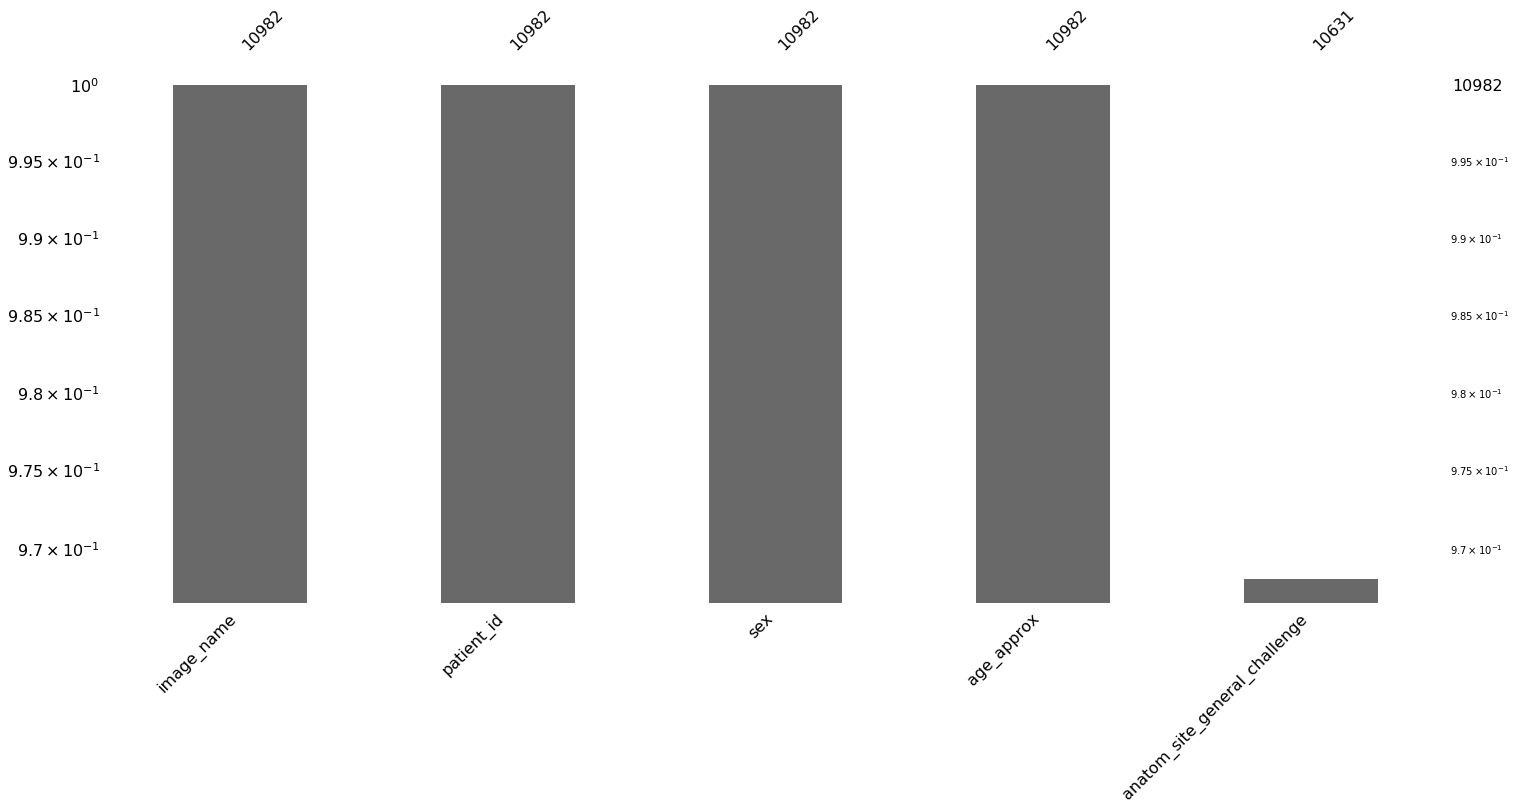

In [9]:
msno.bar(csv_test_file, log=True)

### Dendrogram

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity, then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

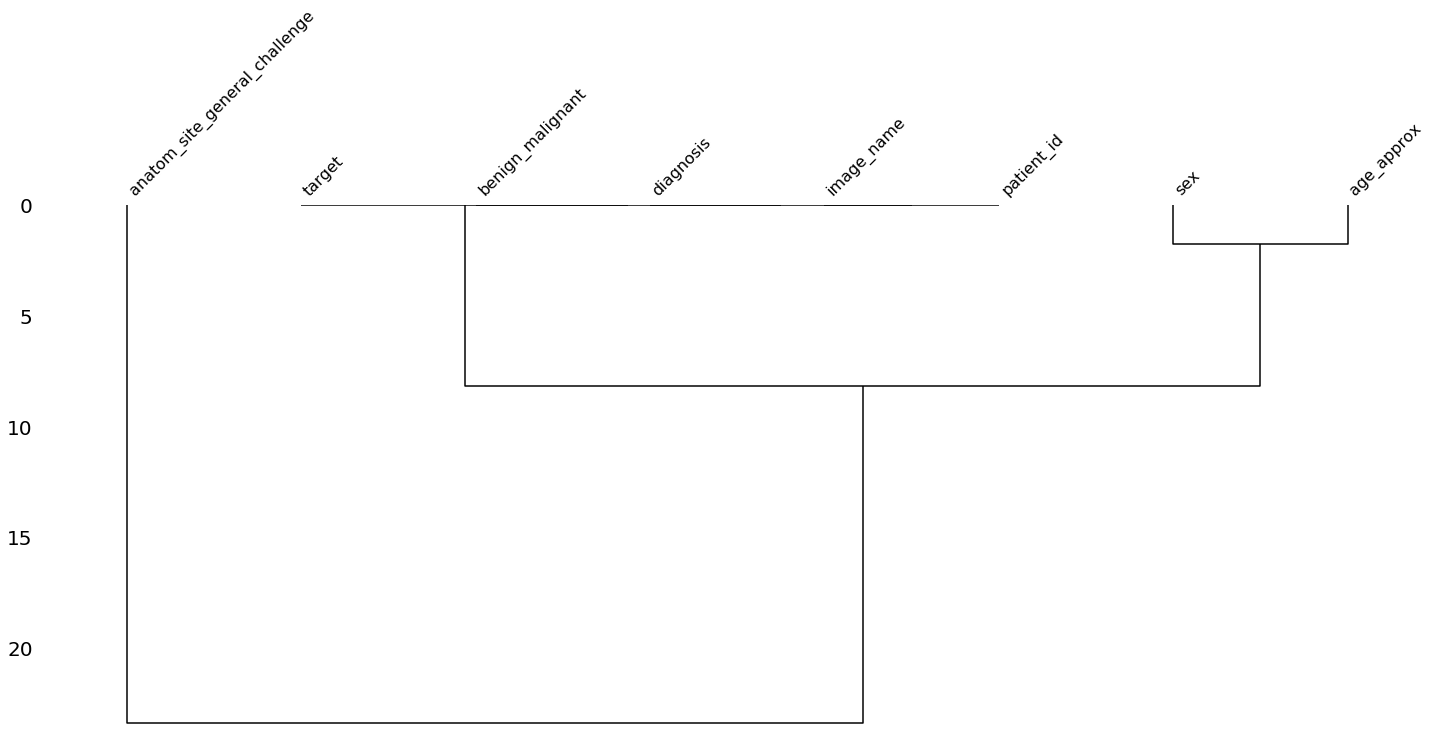

In [10]:
msno.dendrogram(csv_train_file)

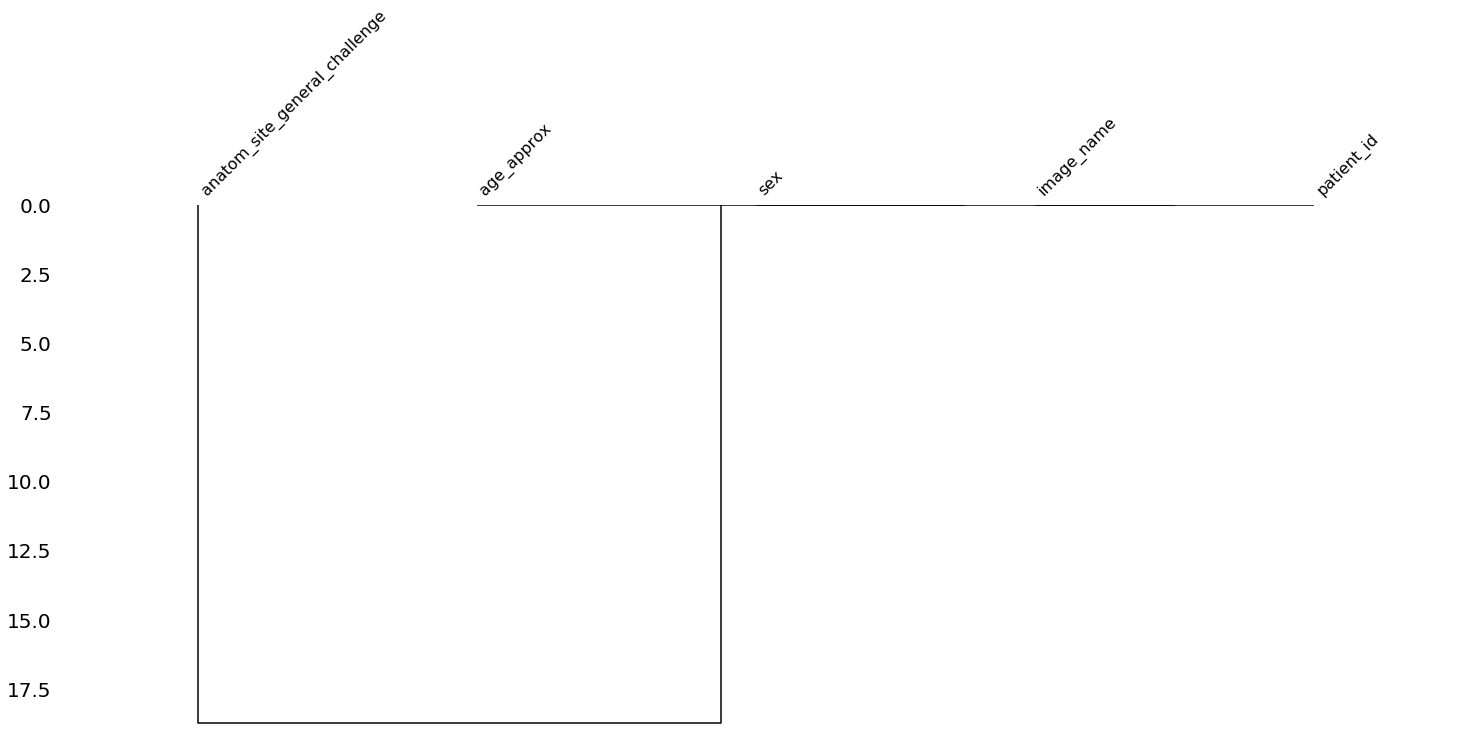

In [11]:
msno.dendrogram(csv_test_file)

### Age

In [12]:
df_all[df_all['age_approx'].isnull()]

,age_approx,anatom_site_general_challenge,benign_malignant,diagnosis,image_name,patient_id,sex,target
38,NaN,lower extremity,benign,unknown,ISIC_0088137,IP_5205991,NaN,0.0
384,NaN,upper extremity,benign,unknown,ISIC_0229600,IP_5205991,NaN,0.0
432,NaN,torso,benign,nevus,ISIC_0239070,IP_0550106,female,0.0
750,NaN,torso,benign,unknown,ISIC_0331124,IP_9835712,NaN,0.0
829,NaN,upper extremity,benign,unknown,ISIC_0353280,IP_9835712,NaN,0.0
...,...,...,...,...,...,...,...,...
30224,NaN,upper extremity,benign,unknown,ISIC_9132088,IP_5205991,NaN,0.0
31338,NaN,lower extremity,benign,unknown,ISIC_9470153,IP_9835712,NaN,0.0
31451,NaN,torso,benign,unknown,ISIC_9501056,IP_9835712,NaN,0.0
32142,NaN,upper extremity,benign,unknown,ISIC_9710367,IP_5205991,NaN,0.0


#### Correlation with target

In [13]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'age_approx']

,Feature 1,Feature 2,Correlation Coefficient
1,age_approx,age_approx,1.000000
3,age_approx,target,0.086388


#### Distribution against sex

In [14]:
age_by_sex = df_all.groupby(['sex']).median()['age_approx']

for sex in ['female', 'male']:
    print(f'Median age of {sex}s: {age_by_sex[sex]}')
print('Median age of all passengers: {}'.format(df_all['age_approx'].median()))

Median age of females: 45.0
Median age of males: 50.0
Median age of all passengers: 50.0
